### INTRODUCTION
Since working from home has become the new strange normal, over 69% of employees have been showing burnout symptoms globally. On the occasion of World Mental Health Day (October 10th), HackerEarth shared a challenge to build a machine learning model that predicts the employee burnout rate based on numerous factors. 

The aim of this project is not only to explore the dataset and define a model for burn rate prediction but also to get inspired on how to use the result to create an interactive decision-making dashboard.

### Questions to be answered:

* What aspects correlate well to burn rate?
* How remote work affect burn rate?
* How well can we predict an individual's burn rate?
* +1 What are the costs of work related stress at the organizational level?

### Main blocks of code (file name):
* Dataset import (employee_burn_rate_data cleaning.ipynb)
* Data understanding (employee_burn_rate_data cleaning.ipynb)
* Data preparing (employee_burn_rate_data cleaning.ipynb)
* Data analysis (employee_burn_rate_data cleaning.ipynb)
* Burnout Rate prediction (employee_burn_rate prediction.ipynb)
* Evaluation, result comparison, error statistics (employee_burn_rate prediction.ipynb)
* Code for interactive decision-making dashboard (prediction_dashboard.py)

_____________________________________________ _ _ _ ________________________________________________

### Dataset import:

In [16]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics


# import dataset
df_test = pd.read_csv(r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\test.csv")
df_train = pd.read_csv(r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\train.csv")

df_test.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   
2  fffe33003400380035003900      2008-11-13    Male      Product   
3      fffe3100370039003200      2008-02-07  Female      Service   
4  fffe32003600390036003700      2008-07-17  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  
0                  No          2.0                  5.0                   7.7  
1                 Yes          1.0                  2.0                   5.2  
2                 Yes          1.0                  3.0                   5.9  
3                  No          3.0                  6.0                   4.6  
4                  No          2.0                  5.0                   6.4

_____________________________________________ _ _ _ ________________________________________________

### Data understanding:

Employee ID, Date of Joining, Company Type, WFH Setup Available (Working From Home), Resource Allocation, Mental Fatigue Score, Burn Rate

Training data: 22750 listing
Unique values / variables

Details about dataset see below

In [17]:
# learning about dataset
print('Test shape: ', df_test.shape, '\nTrain shape: ', df_train.shape)
print('\nDataset description: \n', df_train.describe())
print('\nUnique values: \n', df_train.nunique())

Test shape:  (12250, 8) 
Train shape:  (22750, 9)

Dataset description: 
         Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

Unique values: 
 Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Menta

In [18]:
# let's see missing values
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joini

Missing values in Burn Rate, Resource Allocation and Mental Fatigue Score.


_____________________________________________ _ _ _ ________________________________________________

### Data preparing: 
Including data cleaning, dropping unnecessary NaN, filling NaN, identifying categorical data, encoding. 

In [19]:
# drop the rows with missing burn rate
df_train.dropna(subset=["Burn Rate"], inplace = True)
df_train.shape

(21626, 9)

Create day count for "Date of Joining" in order to reach a better prediction. 

In [20]:
# encoding "Date of Joining"
current_date = pd.to_datetime('today')

df_train['Date of Joining'] = pd.to_datetime(df_train['Date of Joining'])
df_test['Date of Joining'] = pd.to_datetime(df_test['Date of Joining'])

def create_days_count(data):
    ''' 
    Input: It takes the current date and extract the Date of Joining
    Output: Number of days worked at company
    '''
    return(current_date - data['Date of Joining'])

df_train['days_count'] = df_train.apply(create_days_count, axis=1)
df_train['days_count'] = df_train['days_count'].dt.days

df_test['days_count'] = df_test.apply(create_days_count, axis=1)
df_test['days_count'] = df_test['days_count'].dt.days

df_train.head()
df_test.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe31003300390039003000      2008-12-10  Female      Service   
1  fffe31003300310037003800      2008-08-14  Female      Product   
2  fffe33003400380035003900      2008-11-13    Male      Product   
3      fffe3100370039003200      2008-02-07  Female      Service   
4  fffe32003600390036003700      2008-07-17  Female      Product   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  5.0                   7.7   
1                 Yes          1.0                  2.0                   5.2   
2                 Yes          1.0                  3.0                   5.9   
3                  No          3.0                  6.0                   4.6   
4                  No          2.0                  5.0                   6.4   

   days_count  
0        4410  
1        4528  
2        4437  
3        4717  
4        4556

In [21]:
# identifing columns with categorical data
df_train.select_dtypes(include=['object'])

Employee ID  Gender Company Type WFH Setup Available
0      fffe32003000360033003200  Female      Service                  No
1          fffe3700360033003500    Male      Service                 Yes
2      fffe31003300320037003900  Female      Product                 Yes
3      fffe32003400380032003900    Male      Service                 Yes
4      fffe31003900340031003600  Female      Service                  No
...                         ...     ...          ...                 ...
22745  fffe31003500370039003100  Female      Service                  No
22746  fffe33003000350031003800  Female      Product                 Yes
22747          fffe390032003000    Male      Service                 Yes
22748  fffe33003300320036003900  Female      Service                  No
22749      fffe3400350031003800    Male      Product                  No

[21626 rows x 4 columns]

We have 4 columns with categorical data. 
* Gender and Company Type are strings with only 2x2 unique values > let's encode the values to 0/1 in order to use in the prediction,
* Drop Employee ID - it has no added information,
* Drop Date of Joining, because we have days_count already for prediction.

In [22]:
# encoding caterogical variables
df_train['Gender'] = df_train['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_train['Company Type'] = df_train['Company Type'].apply(lambda x: 0 if x=='Service' else 1)
df_train['WFH Setup Available'] = df_train['WFH Setup Available'].apply(lambda x: 0 if x=='No' else 1)

df_test['Gender'] = df_test['Gender'].apply(lambda x: 0 if x=='Male' else 1)
df_test['Company Type'] = df_test['Company Type'].apply(lambda x: 0 if x=='Service' else 1)
df_test['WFH Setup Available'] = df_test['WFH Setup Available'].apply(lambda x: 0 if x=='No' else 1)

df_train.head()
df_test.head()

Employee ID Date of Joining  Gender  Company Type  \
0  fffe31003300390039003000      2008-12-10       1             0   
1  fffe31003300310037003800      2008-08-14       1             1   
2  fffe33003400380035003900      2008-11-13       0             1   
3      fffe3100370039003200      2008-02-07       1             0   
4  fffe32003600390036003700      2008-07-17       1             1   

   WFH Setup Available  Designation  Resource Allocation  \
0                    0          2.0                  5.0   
1                    1          1.0                  2.0   
2                    1          1.0                  3.0   
3                    0          3.0                  6.0   
4                    0          2.0                  5.0   

   Mental Fatigue Score  days_count  
0                   7.7        4410  
1                   5.2        4528  
2                   5.9        4437  
3                   4.6        4717  
4                   6.4        4556

In [23]:
# drop "Employee ID" and "Date of Joining" columns
df_train.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)
df_test.drop(['Employee ID', 'Date of Joining'], axis=1, inplace=True)

df_train.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
2       1             1                    1          2.0   
3       0             0                    1          1.0   
4       1             0                    0          3.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  
0                  3.0                   3.8       0.16        4481  
1                  2.0                   5.0       0.36        4420  
2                  NaN                   5.8       0.49        4685  
3                  1.0                   2.6       0.20        4447  
4                  7.0                   6.9       0.52        4549

In [24]:
# missing values in "Resource Allocation" and "Mental Fatigue Score"
# imputing values (median) to the dataset, "Mental Fatigue Score" results incorrect data at 6, therefore we will only drop the NaN rows
df_train.dropna(subset=["Resource Allocation", "Mental Fatigue Score"], axis=0, inplace = True)
df_train.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
3       0             0                    1          1.0   
4       1             0                    0          3.0   
5       0             1                    1          2.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  
0                  3.0                   3.8       0.16        4481  
1                  2.0                   5.0       0.36        4420  
3                  1.0                   2.6       0.20        4447  
4                  7.0                   6.9       0.52        4549  
5                  4.0                   3.6       0.29        4424

_____________________________________________ _ _ _ ________________________________________________

### Data analysis:
Correlation table, grouping data.

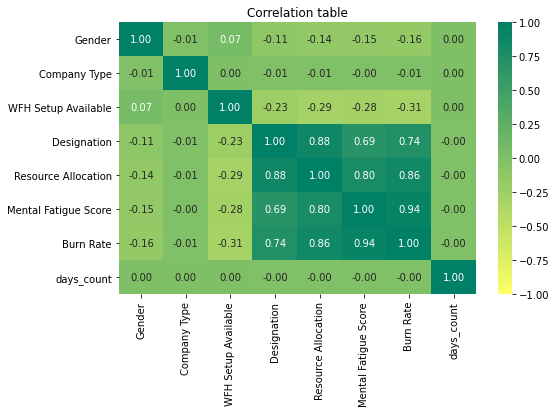

In [25]:
# correlation table
train_corr = df_train.corr()
plt.figure(figsize=(8,5))
sns.heatmap(data=train_corr, annot=True, fmt=".2f", vmin=-1, vmax=1, cmap="summer_r")
plt.yticks(rotation=0)
plt.title('Correlation table')
plt.show()

### What aspects correlate well to burn rate?
Mental Fatigue Score, Resource Allocation (working hours) and Designation variables correlate well with employee burn-rate. Working from home (WFH) setup availability has an opposite, positive effect on the employee burn-rate.

In [26]:
# burn rate grouped by home office setup
burn_rate_WFH_Setup = df_train.groupby(['WFH Setup Available'])['Burn Rate'].mean()
print(burn_rate_WFH_Setup)

WFH Setup Available
0    0.518227
1    0.396303
Name: Burn Rate, dtype: float64


In [27]:
# burn rate grouped by resource allocation
burn_rate_resource = df_train.groupby(['Resource Allocation'])['Burn Rate'].mean()
print(burn_rate_resource)

Resource Allocation
1.0     0.138569
2.0     0.254153
3.0     0.339812
4.0     0.418793
5.0     0.492756
6.0     0.576471
7.0     0.655309
8.0     0.736119
9.0     0.829722
10.0    0.900373
Name: Burn Rate, dtype: float64


Text(0.5, 1.0, 'Resource Allocation by Setup')

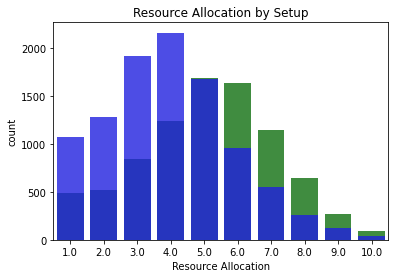

In [29]:
# employees grouped by resource allocation and home office setup
grouped_no = df_train[df_train['WFH Setup Available'] == 0]
grouped_no.groupby(['Resource Allocation'])['Resource Allocation'].count()
sns.countplot(grouped_no['Resource Allocation'], color='green', alpha=0.8)

grouped_yes = df_train[df_train['WFH Setup Available'] == 1]
grouped_yes.groupby(['Resource Allocation'])['Resource Allocation'].count()
sns.countplot(grouped_yes['Resource Allocation'], color='blue', alpha=0.8)

plt.title('Resource Allocation by Setup')

### How remote work affect burn rate?
The average burn rate is 0.396 in the home office setup availability group and 0.518 in the office group (burn rate range is 0–1). The resource allocations (working hours) are less in the home office setup availability group (mean 3.947 and 5.118). It‘s not clear that this difference is due to the more efficient performance, less allocated workload or the first sign of decreased motivation.

In [30]:
grouped_no.mean()

Gender                     0.484463
Company Type               0.344743
WFH Setup Available        0.000000
Designation                2.463785
Resource Allocation        5.118224
Mental Fatigue Score       6.309439
Burn Rate                  0.518227
days_count              4571.253621
dtype: float64

In [31]:
grouped_yes.mean()

Gender                     0.558325
Company Type               0.345464
WFH Setup Available        1.000000
Designation                1.936690
Resource Allocation        3.947458
Mental Fatigue Score       5.239511
Burn Rate                  0.396303
days_count              4571.730808
dtype: float64

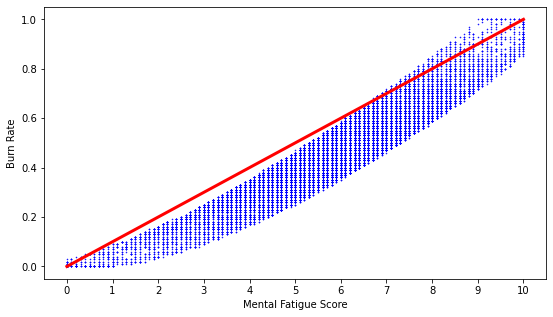

In [33]:
# highest correlation with Mental Fatigue Score
plt.figure(figsize=(9,5))
plt.scatter("Mental Fatigue Score", "Burn Rate", data=df_train, s=0.3, c="blue")
plt.plot([0,10], [0,1], linewidth=3, c="red")
plt.xlabel("Mental Fatigue Score")
plt.ylabel("Burn Rate")
plt.xticks(range(0,11))
plt.show()

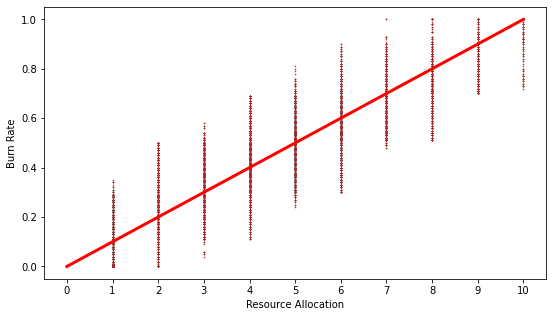

In [34]:
# correlation with "Resource Allocation"
plt.figure(figsize=(9,5))
plt.scatter("Resource Allocation", "Burn Rate", data=df_train, s=0.3, c="brown")
plt.plot([0,10], [0,1], linewidth=3, c="red")
plt.xlabel("Resource Allocation")
plt.ylabel("Burn Rate")
plt.xticks(range(0,11))
plt.show()

In [35]:
df_test.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       1             1                    1          1.0   
2       0             1                    1          1.0   
3       1             0                    0          3.0   
4       1             1                    0          2.0   

   Resource Allocation  Mental Fatigue Score  days_count  
0                  5.0                   7.7        4410  
1                  2.0                   5.2        4528  
2                  3.0                   5.9        4437  
3                  6.0                   4.6        4717  
4                  5.0                   6.4        4556

In [36]:
# saving the cleaned data
clean_df_train = df_train.copy()
clean_df_train.to_csv("clean_df_train.csv", index=False)
train_file_path = r"C:\Users\BernadettKepenyes\Documents\GitHub\employee-burnout\clean_df_train.csv"
new_df_train = pd.read_csv(train_file_path)

new_df_train.head()

Gender  Company Type  WFH Setup Available  Designation  \
0       1             0                    0          2.0   
1       0             0                    1          1.0   
2       0             0                    1          1.0   
3       1             0                    0          3.0   
4       0             1                    1          2.0   

   Resource Allocation  Mental Fatigue Score  Burn Rate  days_count  
0                  3.0                   3.8       0.16        4481  
1                  2.0                   5.0       0.36        4420  
2                  1.0                   2.6       0.20        4447  
3                  7.0                   6.9       0.52        4549  
4                  4.0                   3.6       0.29        4424